To get the global minimum we need to use Logarithmic loss function:


In [16]:
def loss(h,y):
    loss = (-y*np.log(h)-(1-y)*np.log(1-h)).mean()
    return loss

Find the direction of gradient:

In [17]:
def gradient(X,h,y):
    gradient = np.dot(X.T,(h-y))/y.size
    return gradient

In [18]:
import pandas as pd

df = pd.read_csv("course-8-data.csv",header = 0)
df.head()

,X0,X1,Y
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


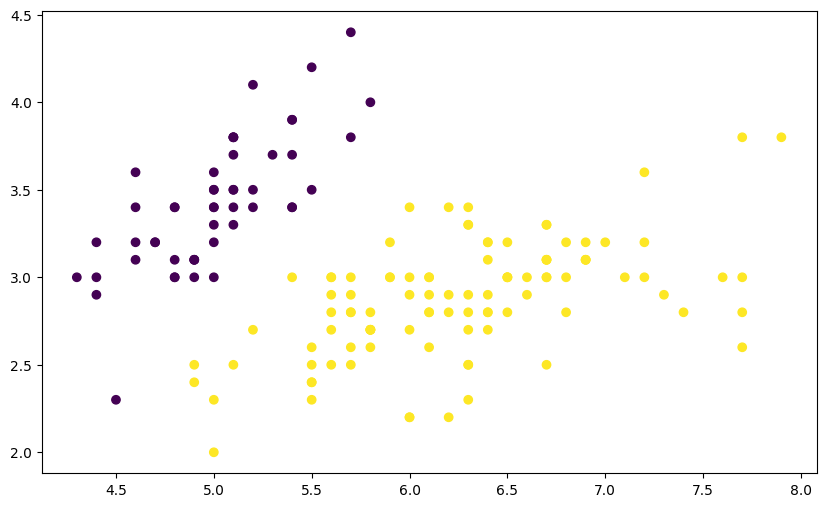

In [19]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(df["X0"],df["X1"],c=df["Y"])

In [20]:
import numpy as np
def sigmoid(z):
    sigmoid = 1 / (1+np.exp(-z))
    return sigmoid

def logistic_regression(x,y,lr,num_iter):
    intercept_ = np.ones((x.shape[0],1)) #Initialize intercept
    x = np.concatenate((intercept_,x),axis=1)
    least_ = np.zeros(x.shape[1])
    
    for i in range(num_iter):
        z = np.dot(x,least_) 
        h = sigmoid(z)#The sigmoid function
        
        g = gradient(x,h,y)
        least_ -= lr*g #Find the least value of the loss function
        
        loss_ = loss(h,y)# The loss value of the loss function
        return loss_,least_ #return the loss value and the least value of the loss function
                            #after iteration

In [21]:
x = df[["X0", "X1"]].values
y = df["Y"].values
lr = 0.01 
num_iter = 30000  

L = logistic_regression(x, y, lr, num_iter)
L

(0.6931471805599454, array([0.00166667, 0.01253   , 0.00387667]))

In [22]:
def Logistic_regression_(x,y,lr,num_iter):
    intercept_ = np.ones((x.shape[0],1)) #Initialize intercept
    x = np.concatenate((intercept_,x),axis=1)
    least_ = np.zeros(x.shape[1])
    
    l_list = []
    for i in range(num_iter):
        z = np.dot(x,least_) 
        h = sigmoid(z)#The sigmoid function
        
        g = gradient(x,h,y)
        least_ -= lr*g #Find the least value of the loss function
        
        loss_ = loss(h,y)# The loss value of the loss function
        l_list.append(loss_)
    return l_list



Text(0, 0.5, 'Loss function')

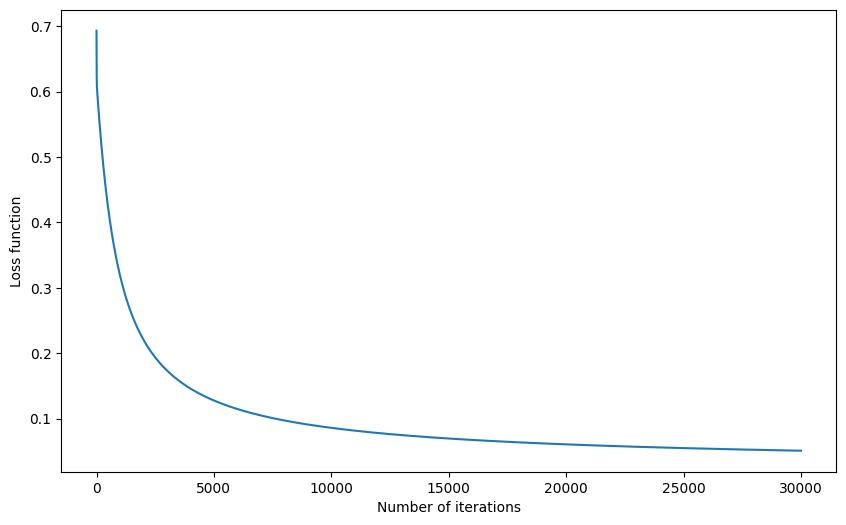

In [23]:
l_y = Logistic_regression_(x, y, lr, num_iter)
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(len(l_y))], l_y)
plt.xlabel("Number of iterations")
plt.ylabel("Loss function")

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(
    tol = 0.001,max_iter=10000,solver='liblinear'
)
model.fit(x,y)
model.coef_,model.intercept_

(array([[ 2.49579289, -4.01011301]]), array([-0.81713932]))

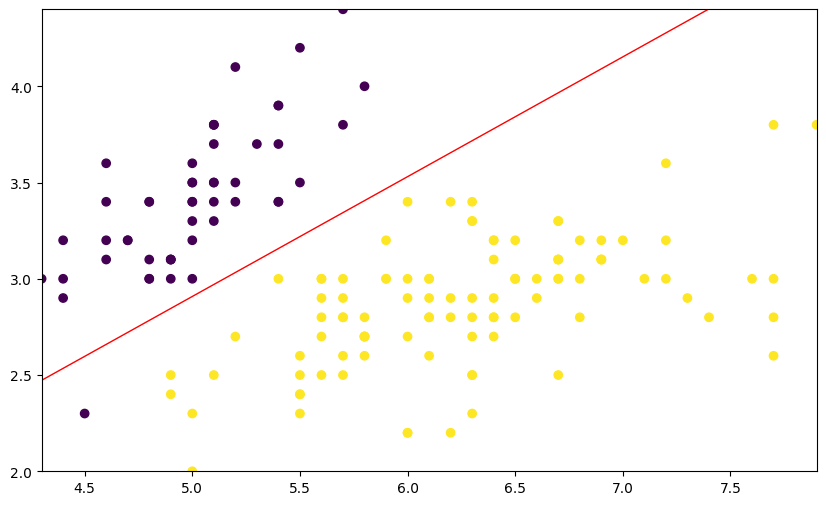

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(df["X0"], df["X1"], c=df["Y"])

x1_min, x1_max = df["X0"].min(), df["X0"].max()
x2_min, x2_max = df["X1"].min(), df["X1"].max()

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

probs = (np.dot(grid, model.coef_.T) + model.intercept_).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0], linewidths=1, colors="red")

In [38]:
model.score(x, y)

0.9933333333333333